# Introducción a series de tiempo con volatilidad 

In [1]:
import numpy as np

In [2]:
random = np.random.rand(2, 3)

print(random)

[[0.873822   0.076476   0.24651169]
 [0.89303057 0.57142306 0.50902017]]


In [3]:
import scipy as sp 

t=sp.zeros(100)
t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  del sys.path[0]


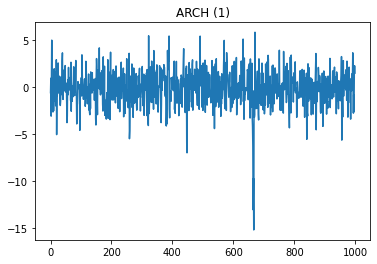

In [4]:
import matplotlib.pyplot as plt

sp.random.seed(123)
n=1000        
n1=100        
n2=n+n1       

a=(2,0.5)  # a0=2 a1=0.5
errors=sp.random.normal(0,1,n2) 
t=sp.zeros(n2)
t[0]=sp.random.normal(0,sp.sqrt(a[0]/(1-a[1])),1) 
for i in range(1,n2-1):
    t[i]=errors[i]*sp.sqrt(a[0]+a[1]*t[i-1]**2) 
    y=t[n1-1:-1]  

plt.title('ARCH (1)')
x=range(n) 
plt.plot(x,y)
plt.show()

In [5]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import datetime as dt

import pandas as pd 

import pandas_datareader.data as web

from arch import arch_model

In [8]:
import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2018,3,26)
end = dt.datetime(2018,3,29)

web.DataReader('IBM','yahoo', start, end).reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-03-26,146.902481,143.671127,144.560226,146.625244,4292679,117.899849
1,2018-03-27,148.059280,144.512421,147.179733,145.229446,4062350,116.777481
2,2018-03-28,147.093689,145.210327,145.382416,145.812622,3833381,117.246391
3,2018-03-29,147.122375,144.435944,146.338425,146.682602,3577320,117.945930


In [9]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2014, 1, 1)
sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns)

In [10]:
am

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x7f8b908dcd10